This project is created @ Nov 10th 2023.<br>
sklearn datasets tends to change over time.<br>
It is possible that you have obtained different result or dataset/command invalid

# Import Packages

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt

# install seaborn with command "pip install seaborn"
# https://seaborn.pydata.org/
import seaborn as sns
import numpy as np

%matplotlib inline

# Data Processing

## Gather Data

In [3]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Understand Data

In [5]:
# Find the list of attributes for this object
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Data points and features

In [7]:
type(housing.data)

numpy.ndarray

In [8]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
housing.data.shape

(20640, 8)

In [10]:
# Each value corresponds to the average house value in units of 100,000
# Detail information is provided in the website https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Data Exploration with Pandas Dataframe

In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data = housing.data, columns= housing.feature_names)

# Add colum with the price (target)
data['PRICE'] = housing.target

In [12]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
# Print first 5 rows data
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# Rows at the bottom of dataframe look like following:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [15]:
data.count()

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
PRICE         20640
dtype: int64

## Cleaning data - check for missing values

In [16]:
pd.isnull(data) # Check if there is any missing value

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [17]:
# If missing any value, you will see True instead of False
pd.isnull(data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
PRICE         False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Visualising Data - Histograms, Distributions and Bar Charts

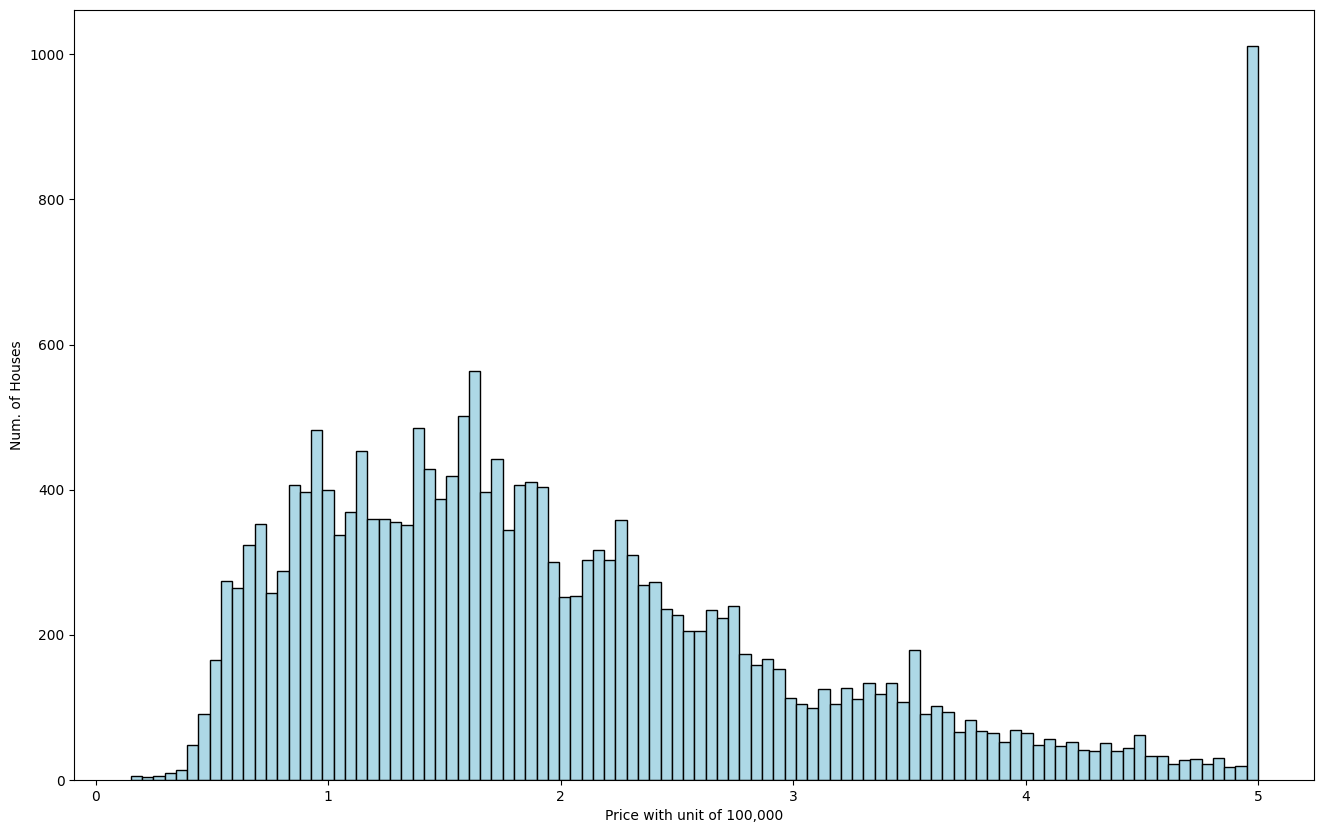

In [19]:
plt.figure(figsize=(16,10))
plt.hist(data['PRICE'], bins = 100, ec = 'black', color='lightblue')
plt.xlabel('Price with unit of 100,000')
plt.ylabel('Num. of Houses')
plt.show()

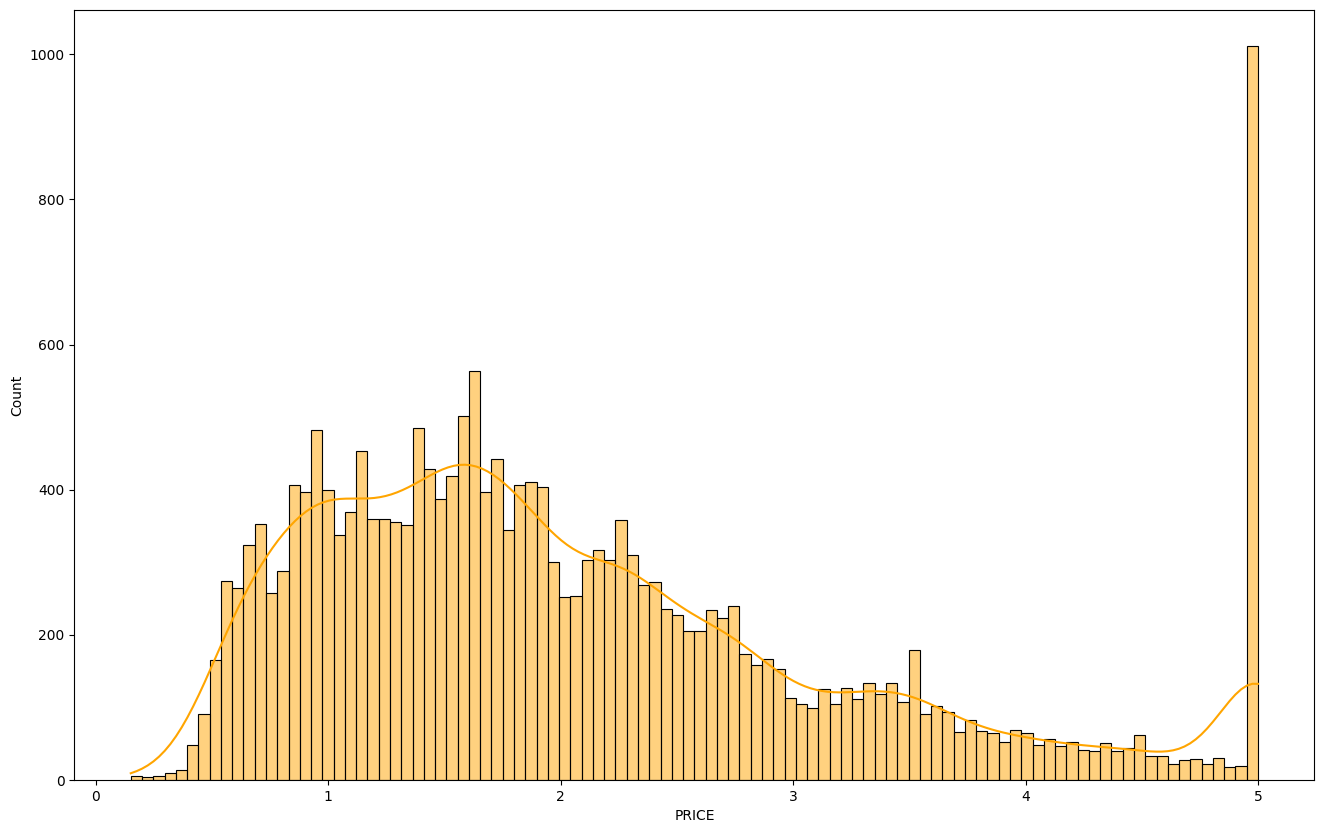

In [20]:
# This section using seaborn
plt.figure(figsize=(16,10))
sns.histplot(data['PRICE'], kde = 'True', bins = 100, color = 'orange') # KDE means kernel density estimate for visualizing dsitribution
plt.show()

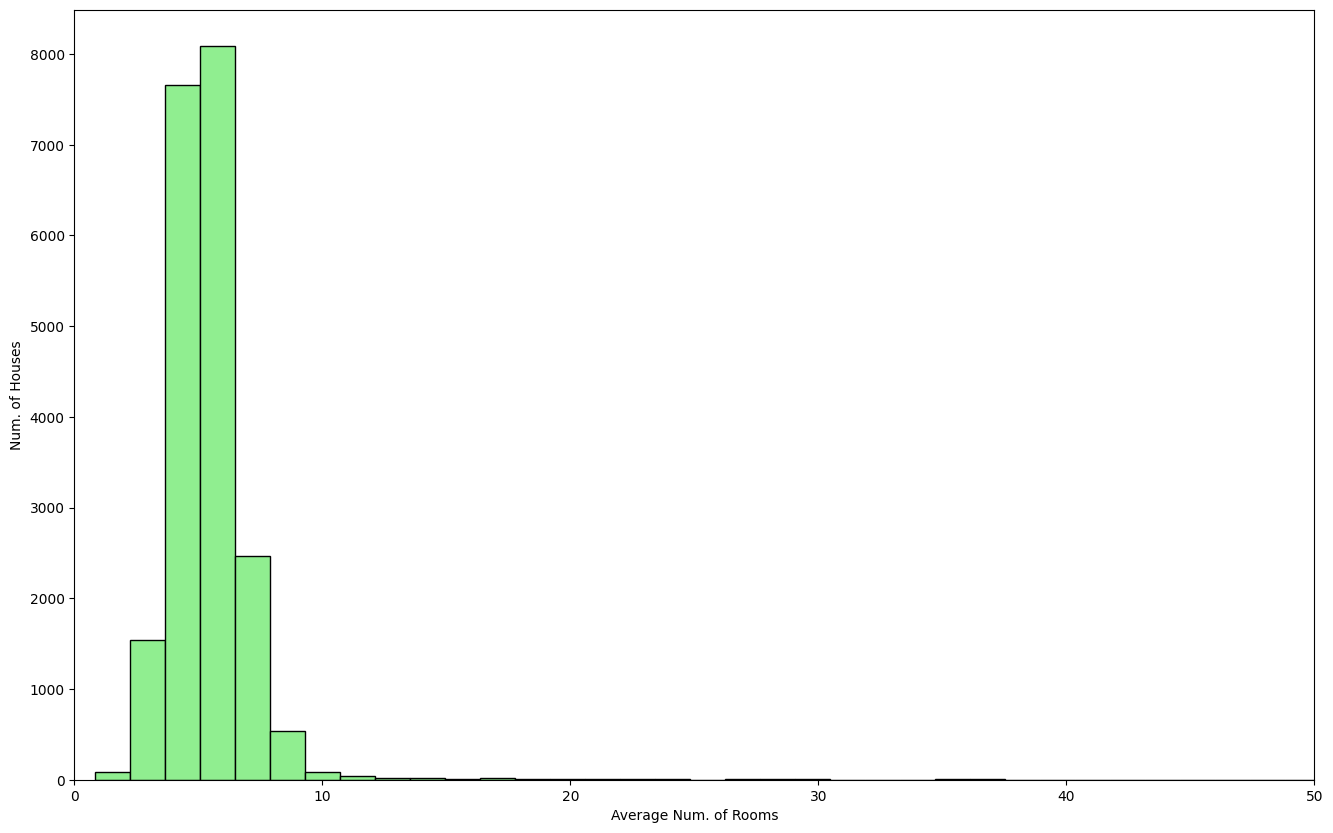

In [21]:
# Plot average number of rooms in California
plt.figure(figsize=(16,10))
plt.hist(data['AveRooms'], bins = 100, ec = 'black', color='lightgreen')
plt.xlim(0,50)
plt.xlabel('Average Num. of Rooms')
plt.ylabel('Num. of Houses')
plt.show()

In [22]:
data['AveRooms'].mean()

5.428999742190376

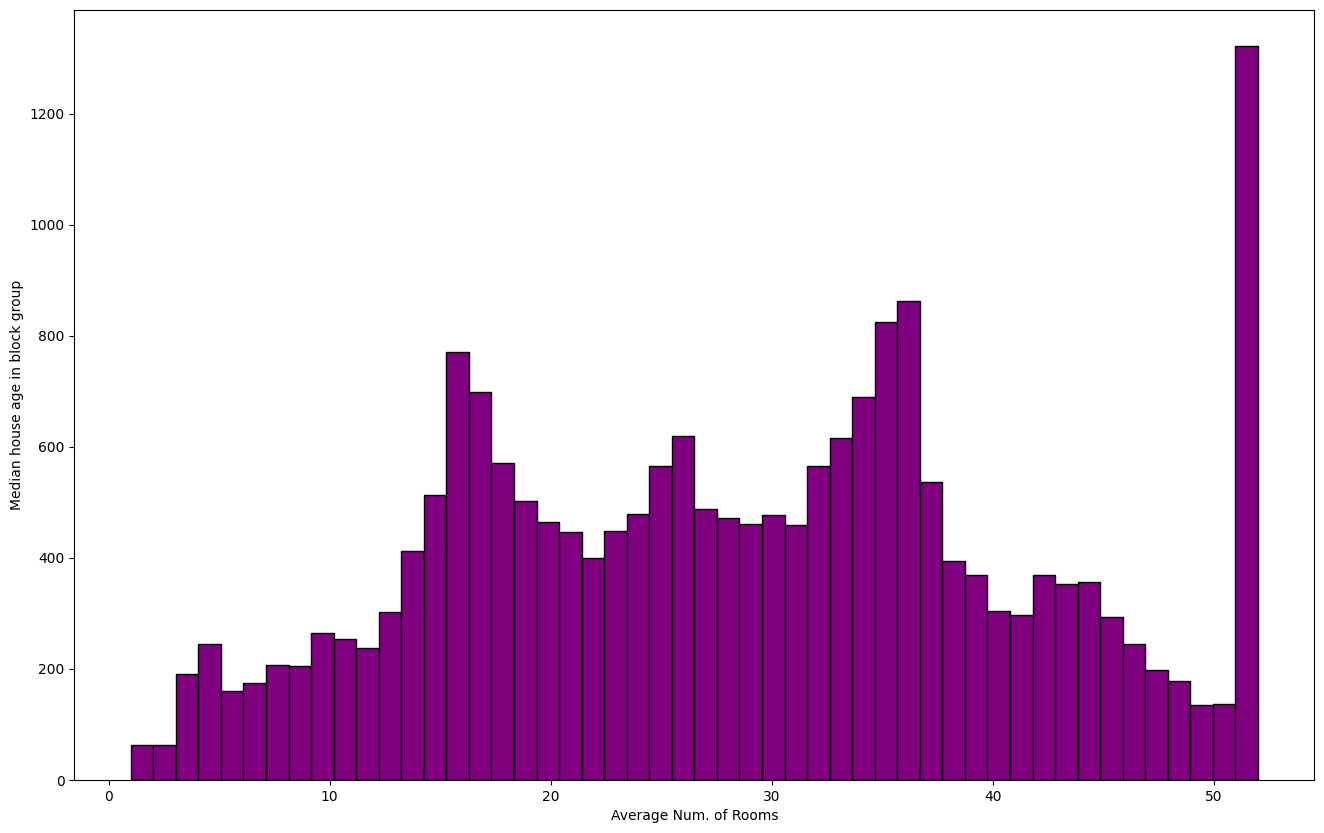

In [23]:
# Plot median house age in block group
plt.figure(figsize=(16,10))
# you could set relative width/space of bin width by adding parameter 'rwidth = 1'
plt.hist(data['HouseAge'], bins = 50, ec = 'black', color='purple')
#plt.xlim(0,50)
plt.xlabel('Average Num. of Rooms')
plt.ylabel('Median house age in block group')
plt.show()

In [24]:
print('Mean of house age:', data['HouseAge'].mean())
print('Value count:\n',data['HouseAge'].value_counts())

Mean of house age: 28.639486434108527
Value count:
 HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64


Frequency type: <class 'pandas.core.series.Series'>
Index([52.0, 36.0, 35.0, 16.0, 17.0, 34.0, 26.0, 33.0, 18.0, 25.0, 32.0, 37.0,
       15.0, 19.0, 27.0, 24.0, 30.0, 28.0, 20.0, 29.0, 31.0, 23.0, 21.0, 14.0,
       22.0, 38.0, 39.0, 42.0, 44.0, 43.0, 40.0, 13.0, 41.0, 45.0, 10.0, 11.0,
       46.0,  5.0, 12.0,  8.0,  9.0, 47.0,  4.0, 48.0,  7.0,  6.0, 50.0, 49.0,
        3.0,  2.0, 51.0,  1.0],
      dtype='float64', name='HouseAge')


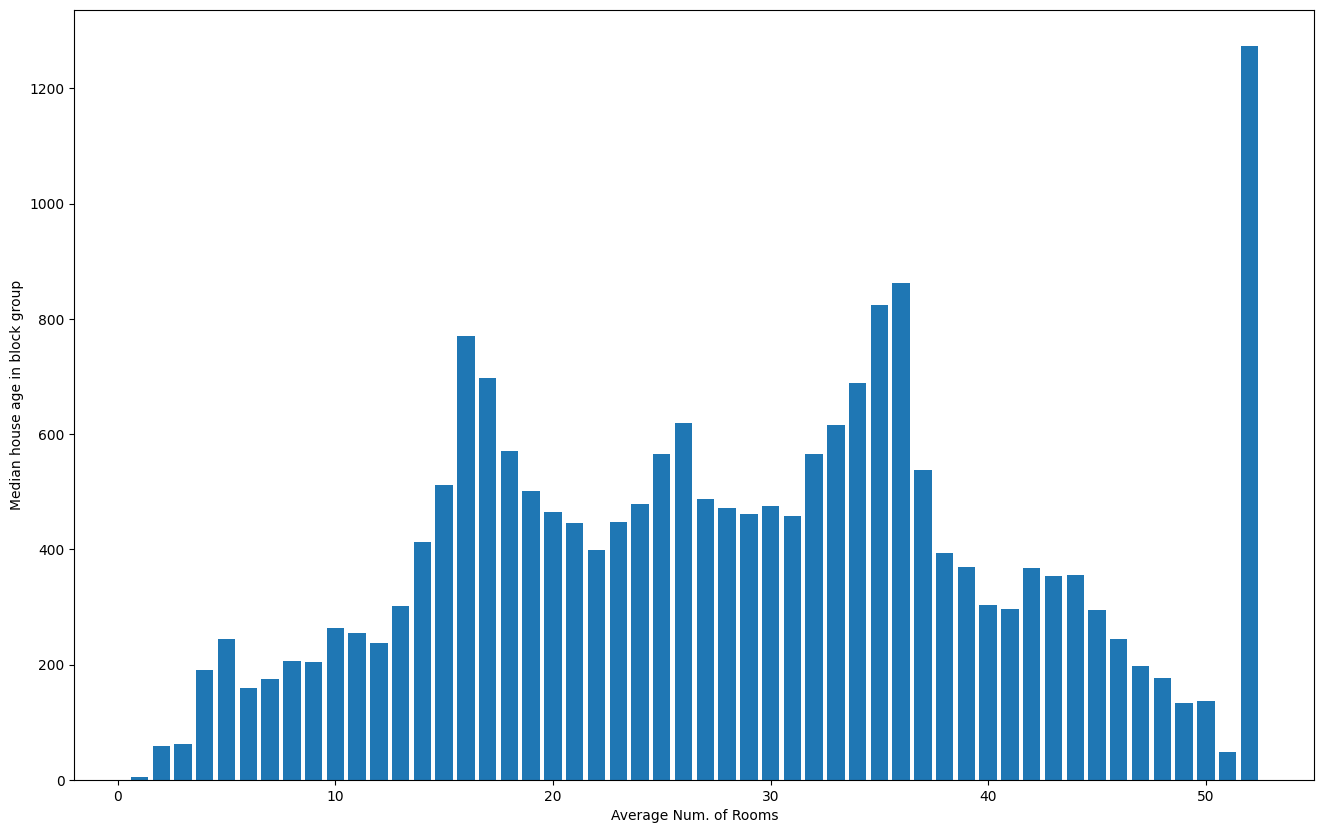

In [25]:
# Alternative way to graph without using hardcoding or provided function

frequency = data['HouseAge'].value_counts()
print('Frequency type:',type(frequency))

# alternative to print first column
# print(frequency.index)
print(frequency.axes[0])

# Plot median house age in block group
plt.figure(figsize=(16,10))
plt.xlabel('Average Num. of Rooms')
plt.ylabel('Median house age in block group')
plt.bar(frequency.index, height=frequency)
plt.show()

## Descriptive Statistics

In [26]:
data['PRICE'].min()

0.14999

In [27]:
data['PRICE'].max()

5.00001

In [28]:
# Pull out all min values
data.min()

MedInc          0.499900
HouseAge        1.000000
AveRooms        0.846154
AveBedrms       0.333333
Population      3.000000
AveOccup        0.692308
Latitude       32.540000
Longitude    -124.350000
PRICE           0.149990
dtype: float64

In [29]:
data.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
PRICE             5.000010
dtype: float64

In [30]:
data.mean()

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
PRICE            2.068558
dtype: float64

In [31]:
data.median()

MedInc           3.534800
HouseAge        29.000000
AveRooms         5.229129
AveBedrms        1.048780
Population    1166.000000
AveOccup         2.818116
Latitude        34.260000
Longitude     -118.490000
PRICE            1.797000
dtype: float64

In [32]:
# Pull all statistic description for all features
# 50% is the median value
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Correlation

## $$ \rho_{XY} = corr(X,Y) $$
## $$ -1.0 \le \ rho_{XY} \le +1.0 $$

In [33]:
print('correlation between PRICE and AveRooms:',data['PRICE'].corr(data['AveRooms']))
print('correlation between PRICE and MedInc:',data['PRICE'].corr(data['MedInc']))
print('correlation between PRICE and HouseAge:',data['PRICE'].corr(data['HouseAge']))
print('correlation between PRICE and AveBedrms:',data['PRICE'].corr(data['AveBedrms']))
print('correlation between PRICE and Population:',data['PRICE'].corr(data['Population']))
print('correlation between PRICE and AveOccup:',data['PRICE'].corr(data['AveOccup']))

correlation between PRICE and AveRooms: 0.15194828974145785
correlation between PRICE and MedInc: 0.6880752079585477
correlation between PRICE and HouseAge: 0.10562341249320992
correlation between PRICE and AveBedrms: -0.04670051296948685
correlation between PRICE and Population: -0.024649678888894896
correlation between PRICE and AveOccup: -0.02373741295613435


In [34]:
# Different way to print all correlation
data.corr()
# There are different Correltions, this one is defaulted as Pearson Correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [35]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### NOTE: 
1. The correlation only works for continous signal. The discrete signal doesn't work.(For example, you can't describe binary signal 1 and 0 with correlation of PRICE) .
2. Correlation does not imply causation(For example, everyone drink water in 1850 and everyone is passed away. You can't conclude water casuing death).
3. Only checks for linear relationships

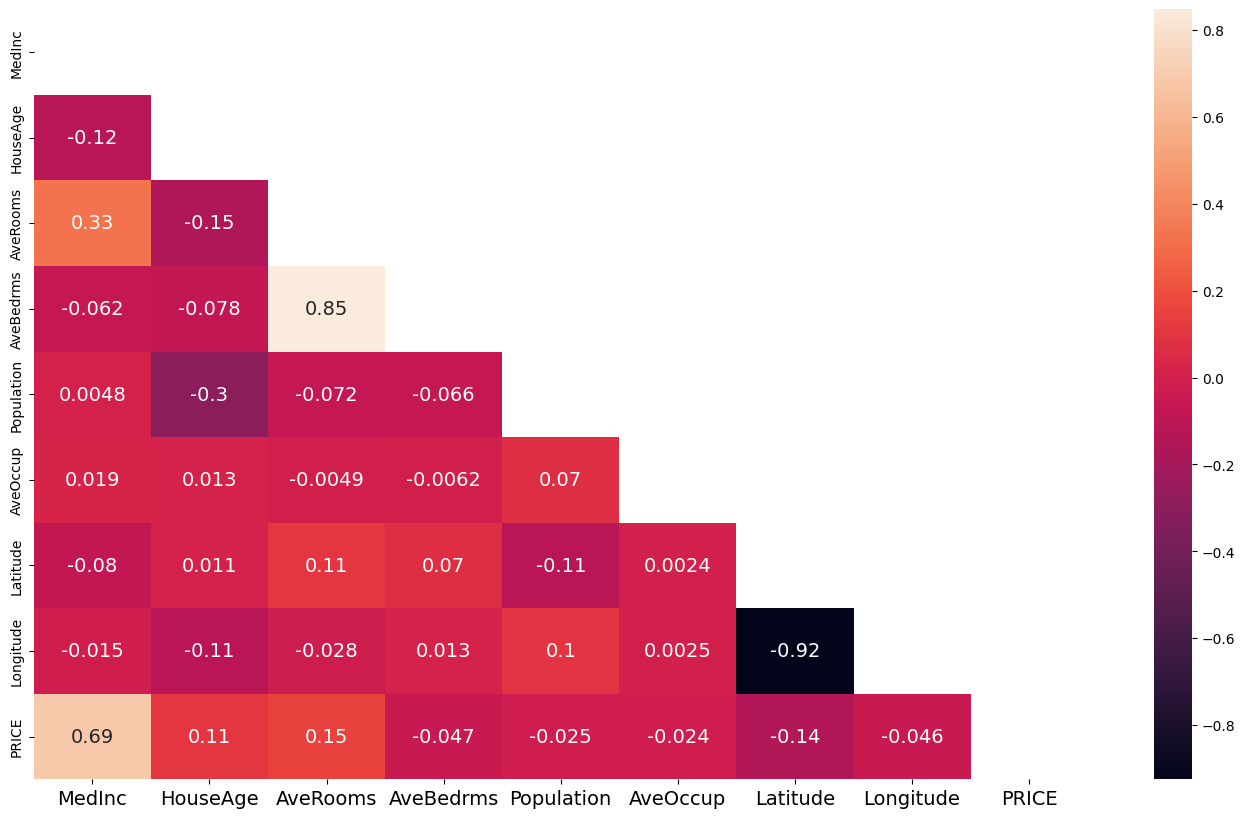

In [37]:
plt.figure(figsize = (17,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14}) # second mask is the variable created from last cell
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.show()

## Scatter Plot
Scatter plot is still necessary in order to observe the hidden relationship

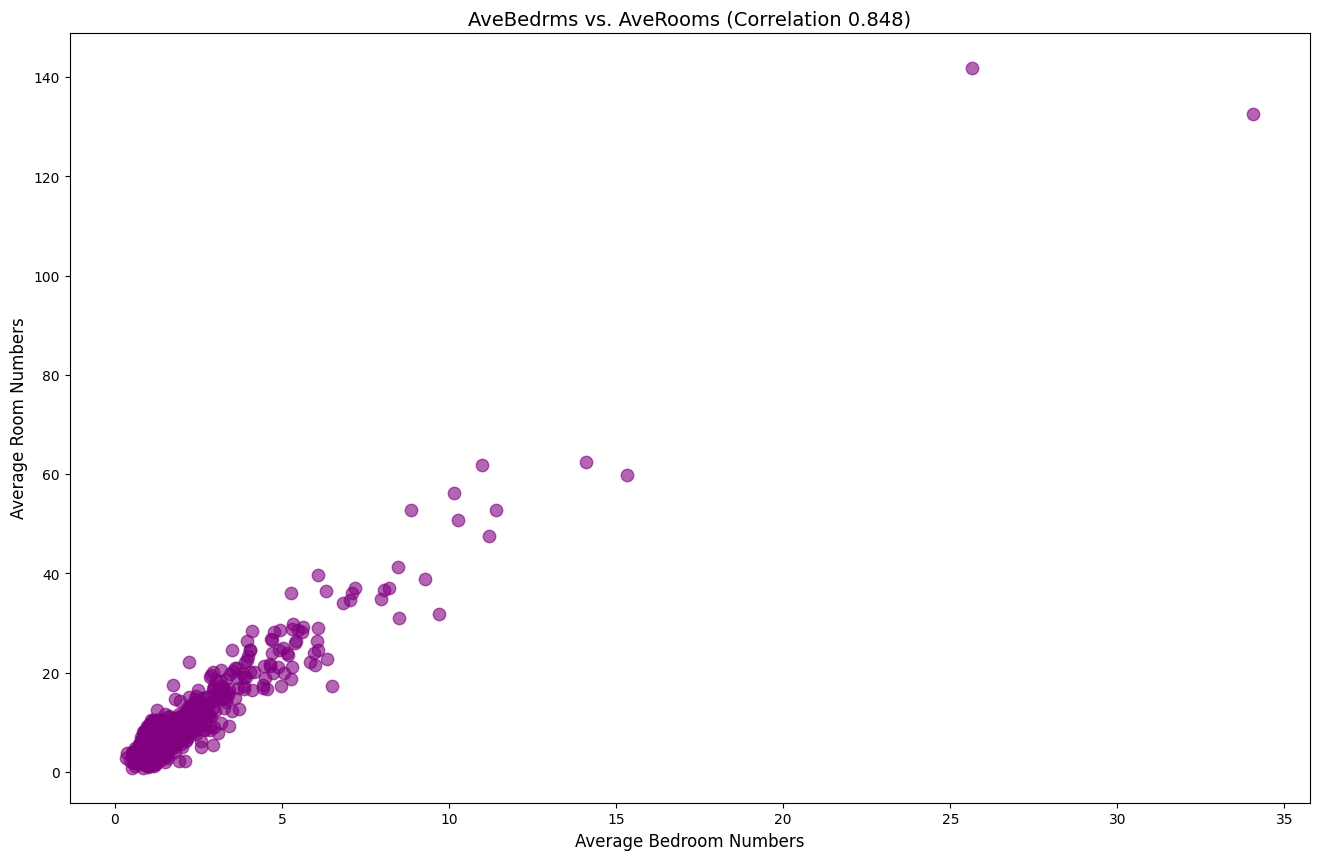

In [38]:
AveBedrms_AveRooms_corr = round(data['AveBedrms'].corr(data['AveRooms']),3)

plt.figure(figsize=(16,10))
plt.xlabel('Average Bedroom Numbers',fontsize = 12)
plt.ylabel('Average Room Numbers',fontsize = 12)
plt.title(f'AveBedrms vs. AveRooms (Correlation {AveBedrms_AveRooms_corr})', fontsize = 14)
plt.scatter(x=data['AveBedrms'], y = data['AveRooms'],alpha=0.6, s = 80, color='purple')
plt.show()

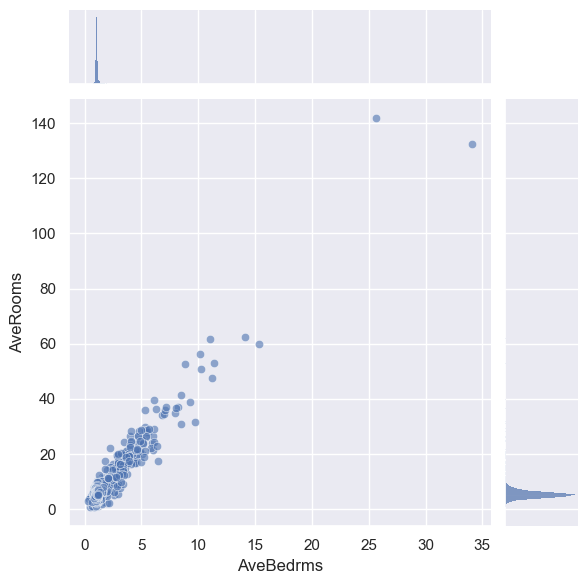

In [39]:
# Alternative way to generating chart
sns.set()
sns.jointplot(x=data['AveBedrms'], y = data['AveRooms'], joint_kws={'alpha':0.6})
plt.show()

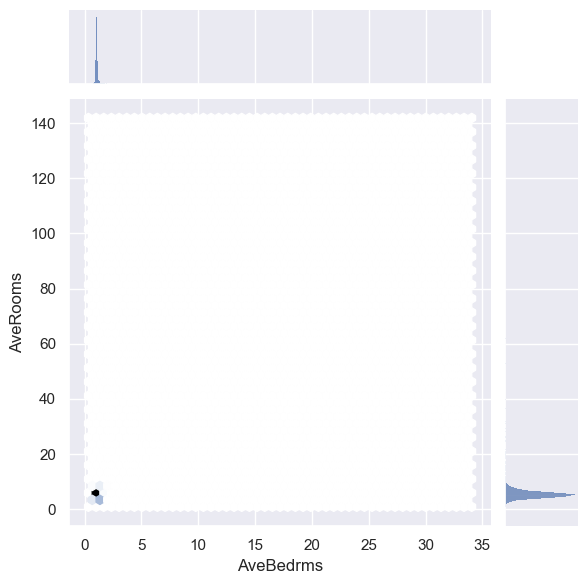

In [40]:
# Alternative way to generating chart
sns.set()
sns.jointplot(x=data['AveBedrms'], y = data['AveRooms'], kind='hex')
plt.show()

### Seaborn Plot

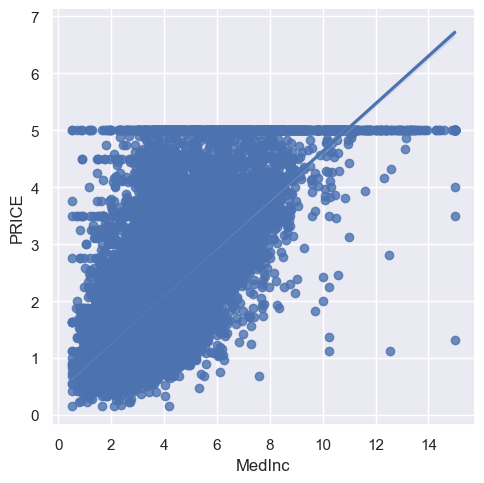

In [41]:
sns.lmplot(x='MedInc', y='PRICE', data=data)
plt.show()

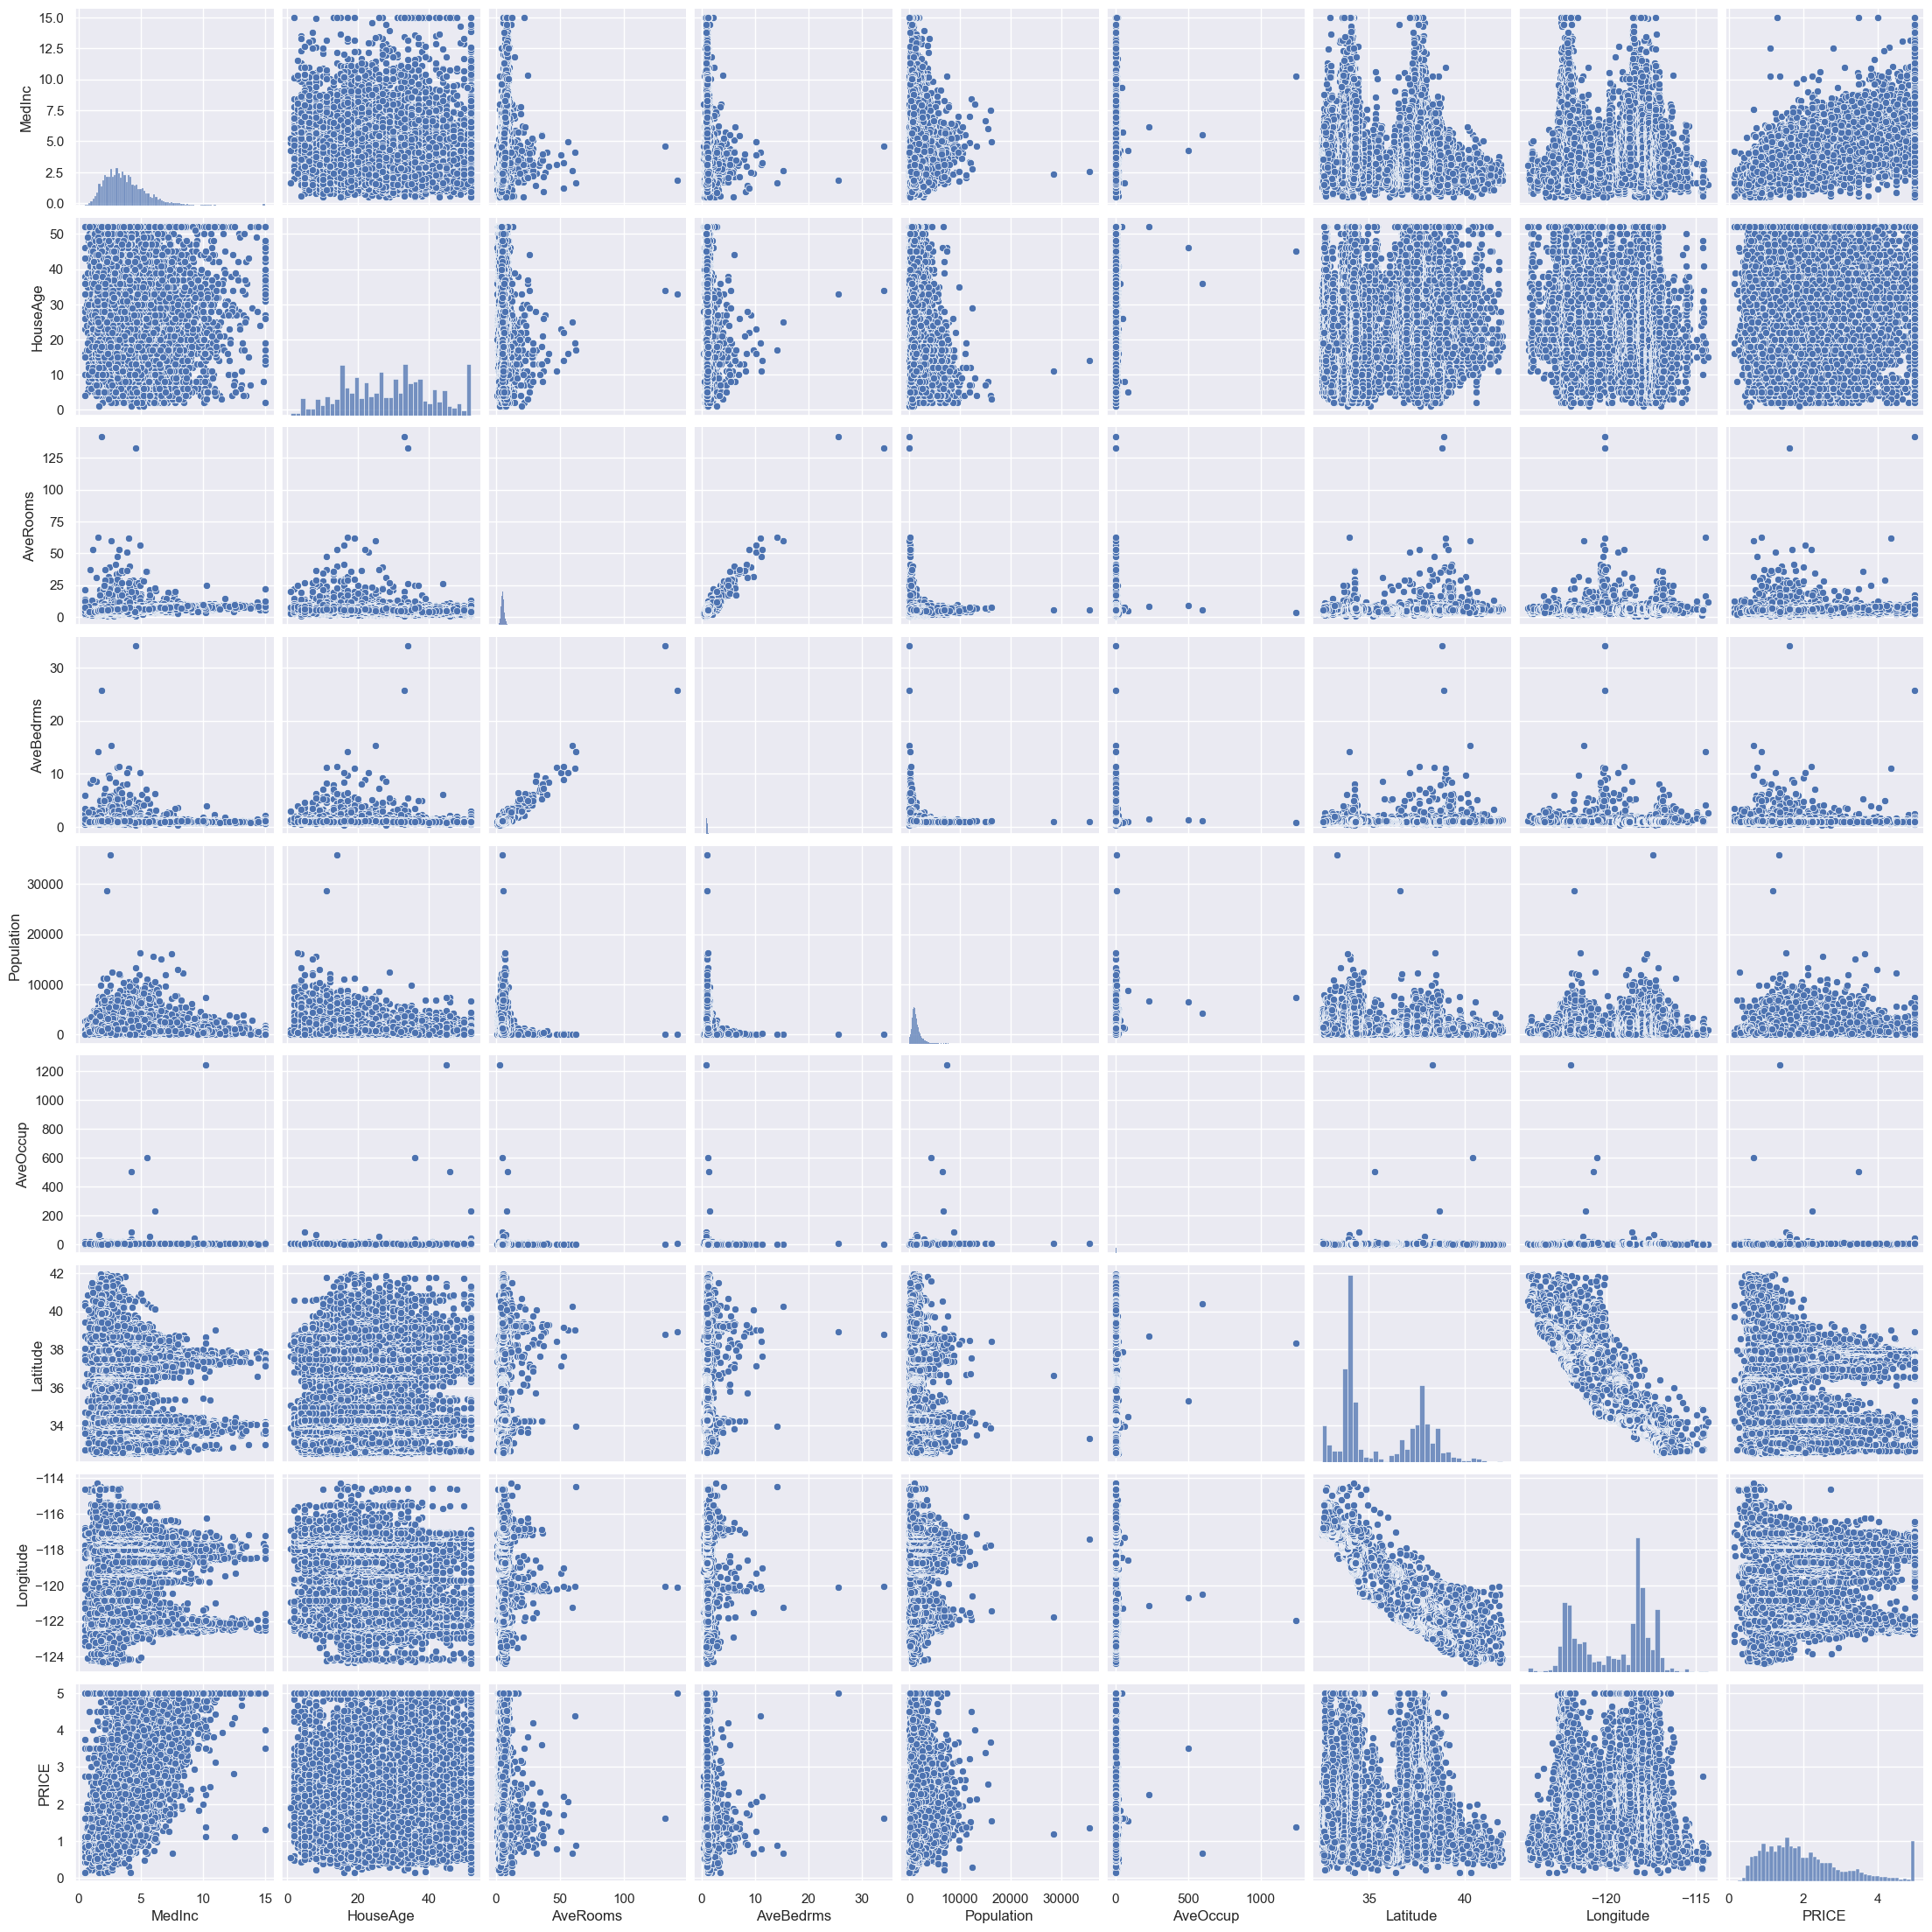

CPU times: total: 52.5 s
Wall time: 53.9 s


In [42]:
%%time

sns.pairplot(data)
plt.show()

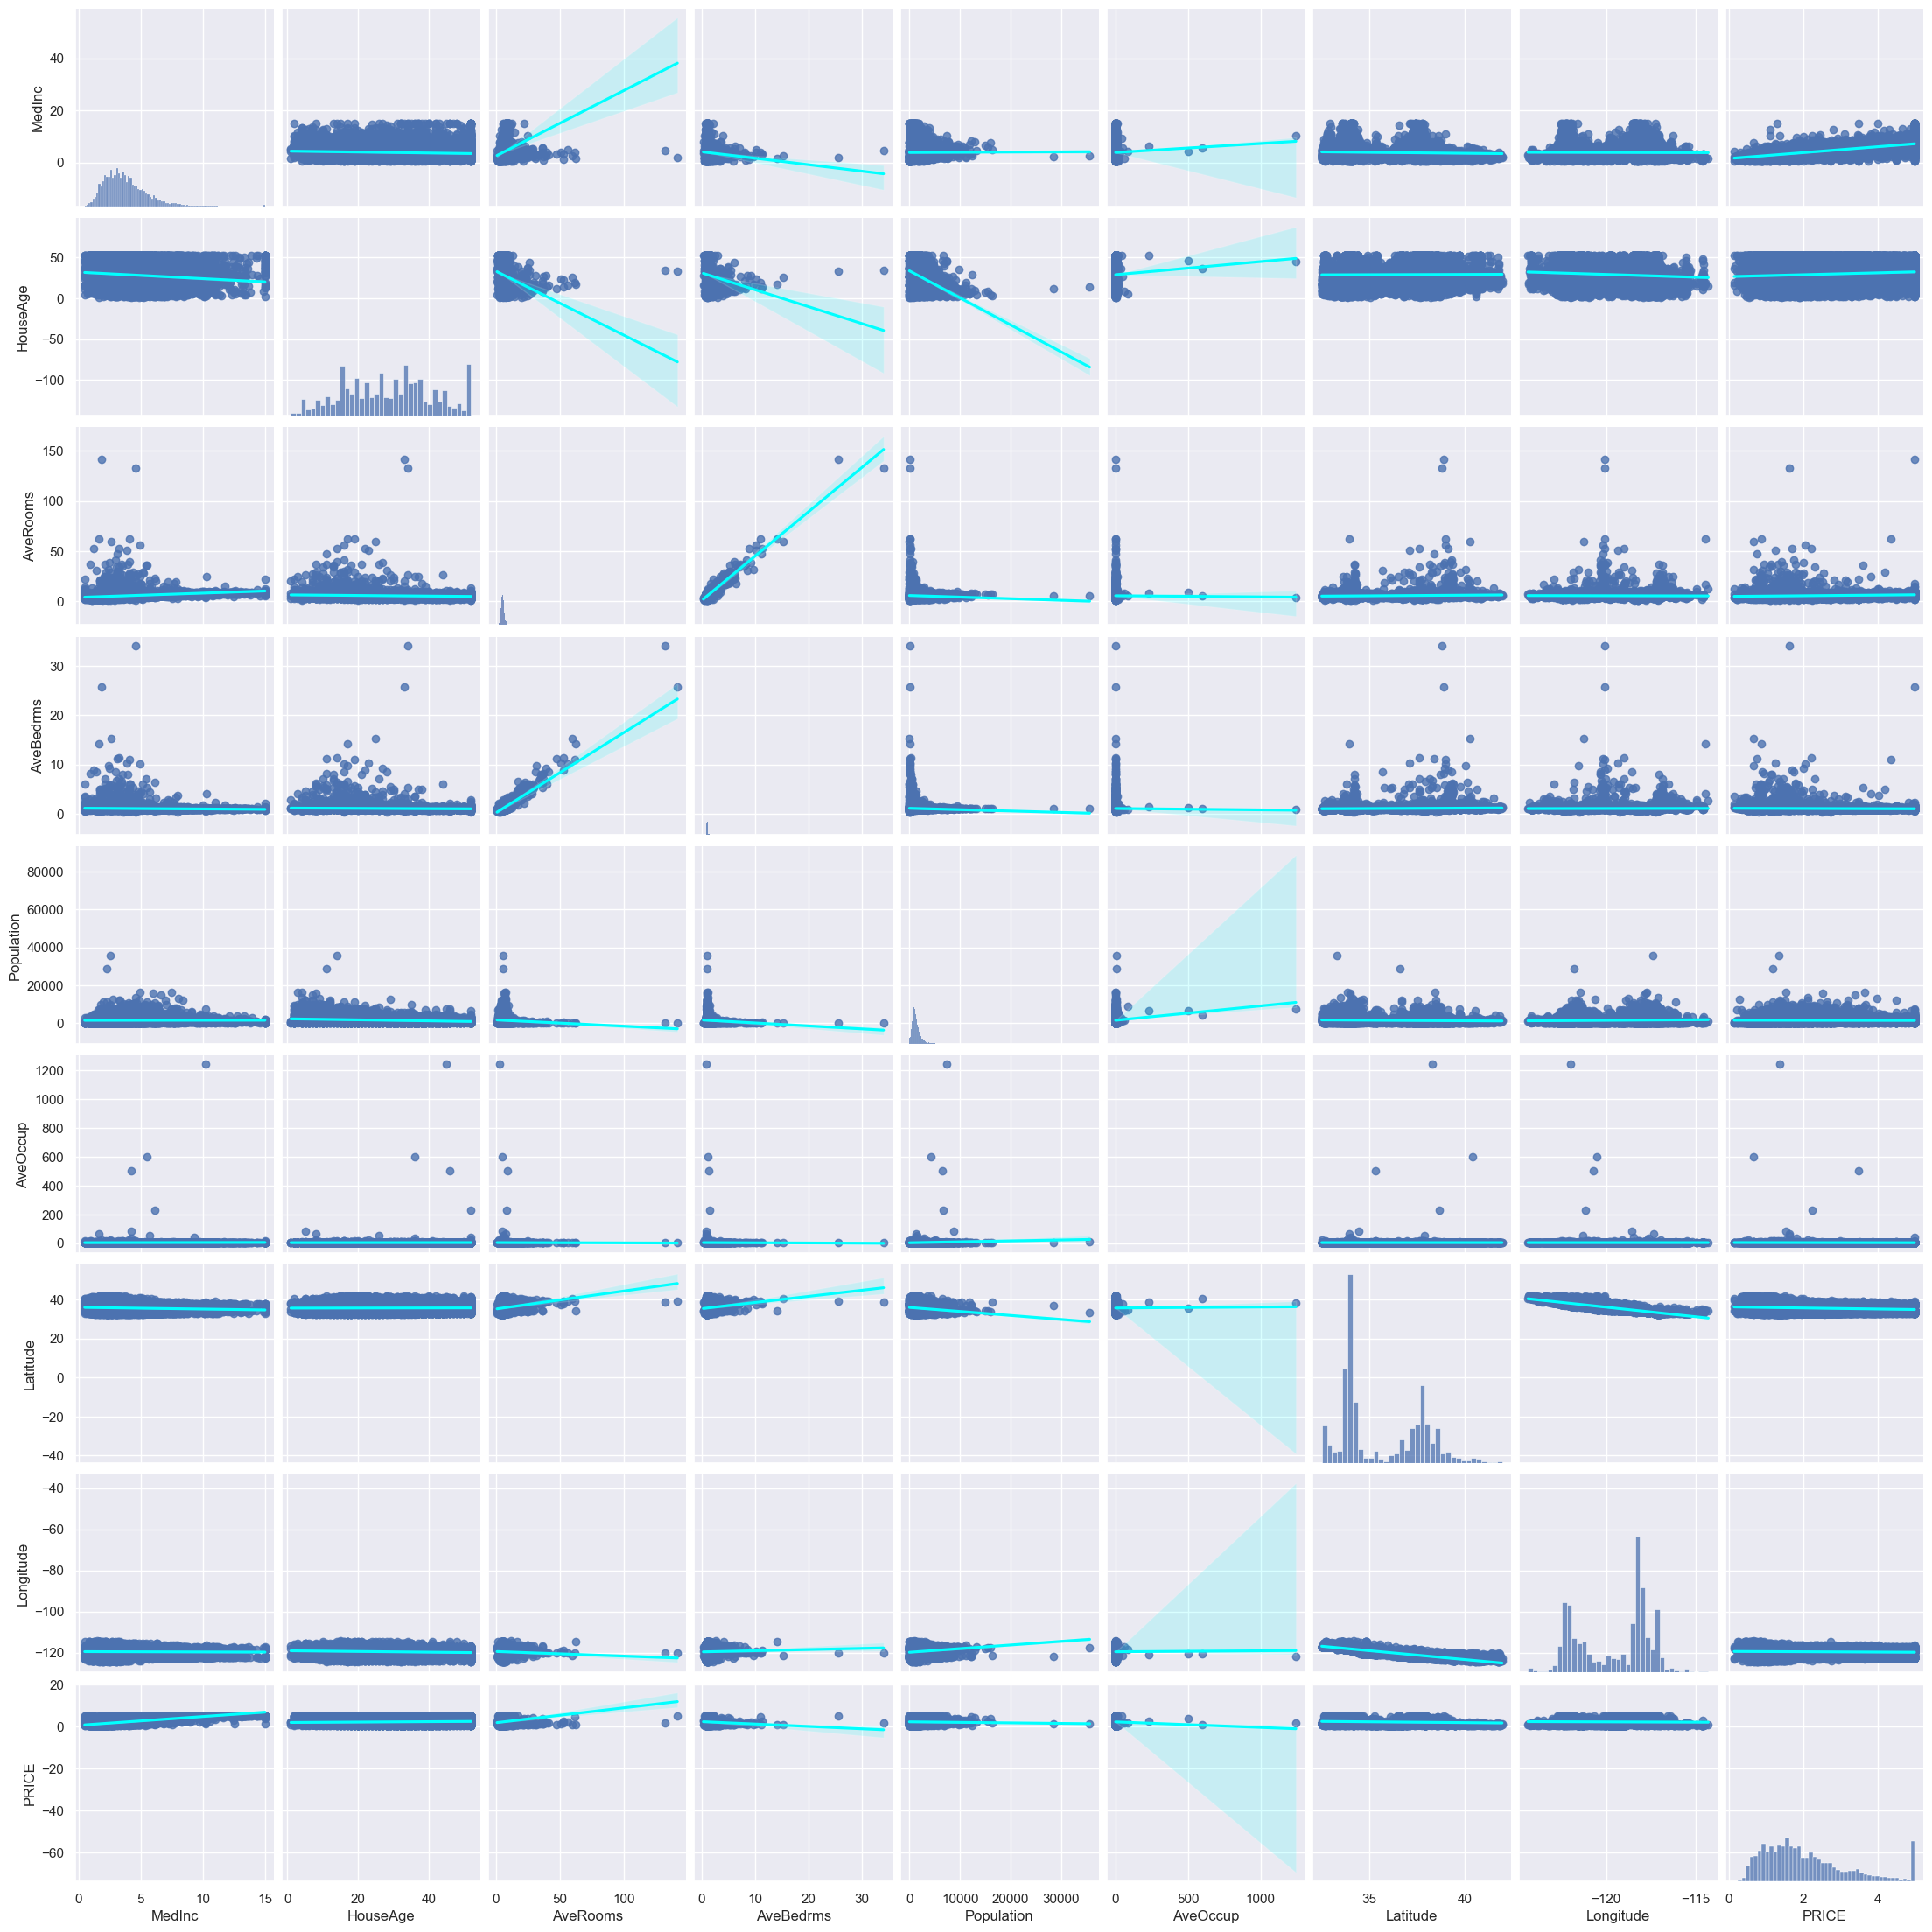

In [43]:
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# Training & Test Dataset Split

In [44]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1) # return features which not include 'PRICE' column

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10) # test size is 20%

# percentage of training and test data set
print('Percentage of training set:',len(X_train)/len(features))
print('Percentage of test data set:',X_test.shape[0]/features.shape[0])

Percentage of training set: 0.8
Percentage of test data set: 0.2


## Multivariable Regression

In [45]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

Intercept: -37.48696576537296


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


In [46]:
print('Training data r-squared:', regr.score(X_train,y_train))
print('Test data r-squared:', regr.score(X_test,y_test))

Training data r-squared: 0.6074049305021048
Test data r-squared: 0.6009790143129101


## Data Transformations

In [47]:
# The skew of normal distribution is 0
data['PRICE'].skew()

0.9777632739098345

In [51]:
y_log = np.log(data['PRICE'])
y_log.head()

0    1.509839
1    1.276758
2    1.258745
3    1.227592
4    1.230225
Name: PRICE, dtype: float64

The benefit of using log transformation is:<br>
1. reducing skew value

In [52]:
y_log.skew()

-0.17317539032496646

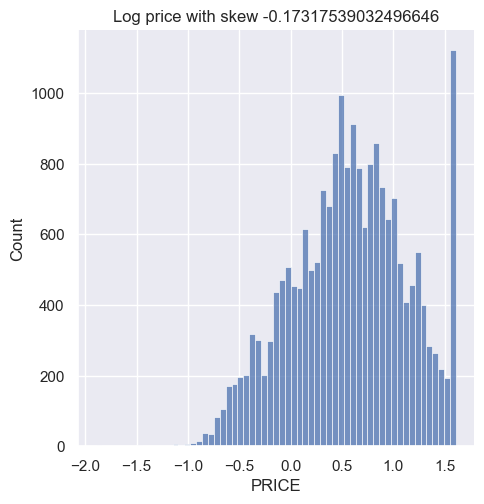

In [53]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

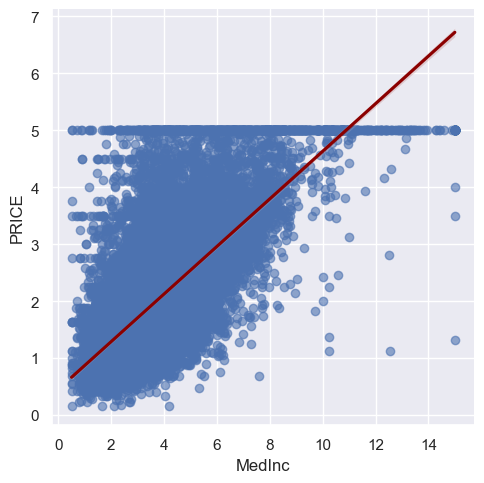

In [54]:
sns.lmplot(x='MedInc', y='PRICE', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

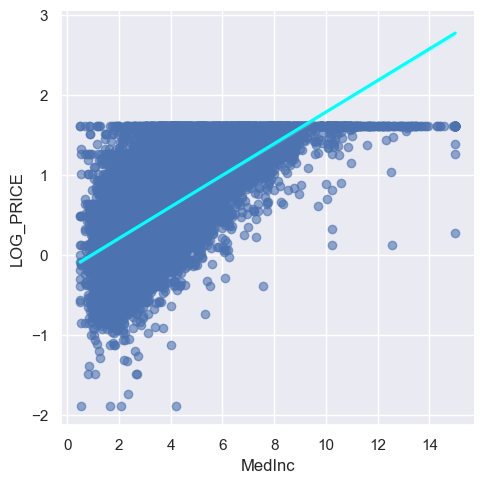

In [55]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='MedInc', y='LOG_PRICE', data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Multivairable Regression Using Log Prices

In [57]:
prices = np.log(data['PRICE']) # use log prices
features = data.drop('PRICE', axis=1) # return features which not include 'PRICE' column

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10) # test size is 20%

In [58]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

Intercept: -24.57049046084647


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


In [59]:
print('Training data r-squared:', regr.score(X_train,y_train))
print('Test data r-squared:', regr.score(X_test,y_test))

Training data r-squared: 0.6168233836099825
Test data r-squared: 0.603748925670488
